In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from datetime import time
import matplotlib.pyplot as pplot
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import math
import random
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.cross_validation import ShuffleSplit, train_test_split
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import Imputer, StandardScaler, LabelEncoder
import os
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
from matplotlib.legend_handler import HandlerLine2D
from sklearn.learning_curve import learning_curve

/home/matheuspds/miniconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/home/matheuspds/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/matheuspds/miniconda3/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/

In [20]:
df_train = pd.read_csv('data_process_final/treino_final.csv')
df_teste = pd.read_csv('data_process_final/teste_final.csv')
df_teste_para_weekday = pd.read_csv('data_process_final/teste_final_para_weekday.csv')

In [200]:
df_validation_1 = df_remove[((df_remove['hour'] >= 6) & (df_remove['hour'] <= 9))]

In [11]:
df_validation_2 = df_remove[((df_remove['hour'] >= 15) & (df_remove['hour'] <= 16))]

In [206]:
volumes_train_validation = df_validation_1['volume'].values

In [3]:
df_validation_list = [df_validation_1, df_validation_2]
df_validation = pd.concat(df_validation_list, ignore_index=True)

NameError: name 'df_validation_1' is not defined

In [14]:
df_validation.to_csv('data_validation.csv', index=False)

In [21]:
df_remove = df_train.loc[(df_train['day'] >= 1) & (df_train['day'] <= 7) ]

df_train = df_train.drop(df_remove.index)

In [22]:
del df_train['volume_proximo']
del df_teste['volume_proximo']

In [23]:
del df_train['volume_proximo_2']
del df_teste['volume_proximo_2']

In [24]:
def adiciona_media_desvio_por_dia(df):
    df['media_volume_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])["volume"].transform(np.mean)
    df['desvio_padrao_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])["volume"].transform(np.std)
    df['desvio_padrao_hora_dia'].fillna(df.groupby(['direction', 'tollgate_id', 'day', 'hour'])["volume"].transform(np.mean), inplace=True)
    df['min_volume_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])['volume'].transform(np.min)
    df['max_volume_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])['volume'].transform(np.max)
    df['mediana_volume_hora_dia'] = df.groupby(['direction', 'tollgate_id', 'day', 'hour'])['volume'].transform(np.median)
    return df

In [25]:
df_train = adiciona_media_desvio_por_dia(df_train)
df_teste= adiciona_media_desvio_por_dia(df_teste)

In [26]:
def adiciona_media_desvio_por_janela_dia_semana_1(df):
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask = (df['time'] > '2016-09-18 00:00:00') & (df['time'] < '2016-09-26 00:00:00')
    df = df.loc[mask]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    return df

def adiciona_media_desvio_por_janela_dia_semana_2(df):
    
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask2 = (df['time'] > '2016-09-18 00:00:00') & (df['time'] < '2016-10-10 00:00:00')
    df = df.loc[mask2]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    
    return df

def adiciona_media_desvio_por_janela_dia_semana_3(df):
    
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask3 = (df['time'] > '2016-09-18 00:00:00') & (df['time'] < '2016-10-17 00:00:00')
    df = df.loc[mask3]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    return df

def adiciona_media_desvio_por_janela_dia_semana_4(df):   
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask4 = (df['time'] > '2016-09-18 00:00:00') & (df['time'] < '2016-10-25 00:00:00')
    df = df.loc[mask4]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week','direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    return df

def adiciona_media_desvio_por_janela_dia_semana_5_teste(df1, df2):
    df_list = [df1, df2]
    df = pd.concat(df_list, ignore_index=True)
    df['time'] = pd.to_datetime(df['time'], format = '%Y-%m-%d %H:%M:%S')
    df['date'] = df['time'].dt.date
    mask4 = (df['time'] >= '2016-10-18 00:00:00') & (df['time'] < '2016-11-01 00:00:00')
    df = df.loc[mask4]
    df['min_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.min)
    df['max_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.max)
    df['mediana_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.median)
    df['media_volume_weekday'] = df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean)
    df['desvio_padrao_weekday'] = df.groupby(['time_window', 'week','direction', 'tollgate_id'])["volume"].transform(np.std)
    df['desvio_padrao_weekday'].fillna(df.groupby(['time_window', 'week', 'direction', 'tollgate_id'])["volume"].transform(np.mean), inplace=True)
    
    
    return df

In [27]:
df_train_a_25 =adiciona_media_desvio_por_janela_dia_semana_1(df_train)
df_train_a_10 = adiciona_media_desvio_por_janela_dia_semana_2(df_train)
df_train_a_17 = adiciona_media_desvio_por_janela_dia_semana_3(df_train)
df_train_a_24 = adiciona_media_desvio_por_janela_dia_semana_4(df_train)
df_teste_a_24 = adiciona_media_desvio_por_janela_dia_semana_5_teste(df_teste_para_weekday, df_teste)

/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://panda

In [28]:
len_train1 = len(df_train_a_25)
len_train2 = len(df_train_a_10)
len_train3 = len(df_train_a_17)
len_train4 = len(df_train_a_24)

x1 = df_train_a_25.ix[:len_train1 - 1, 21:]
x2 = df_train_a_10.ix[:len_train2 - 1, 21:]
x3 = df_train_a_17.ix[:len_train3 - 1, 21:]
x4 = df_train_a_24.ix[:len_train4 - 1, 21:]

df_train_list = [x1, x2, x3, x4]

#df_train_list = [df_train_a_25[df_train_a_25[['min_volume_weekday']]], df_train_a_10[df_train_a_10['min_volume_weekday']]]
#df_train_para_agregar = pd.concat(df_train_list)


/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipyk

In [29]:
df_train_para_agregar = pd.concat(df_train_list, ignore_index=True)

In [30]:
df_train['media_volume_weekday'] = df_train_para_agregar['media_volume_weekday']
df_train['min_volume_weekday'] = df_train_para_agregar['min_volume_weekday']
df_train['max_volume_weekday'] = df_train_para_agregar['max_volume_weekday']
df_train['desvio_padrao_weekday'] = df_train_para_agregar['desvio_padrao_weekday']
df_train['mediana_volume_weekday'] = df_train_para_agregar['mediana_volume_weekday']

In [31]:
df_teste['min_volume_weekday'] = df_teste_a_24['min_volume_weekday']
df_teste['max_volume_weekday'] = df_teste_a_24['max_volume_weekday']
df_teste['mediana_volume_weekday'] = df_teste_a_24['mediana_volume_weekday']
df_teste['media_volume_weekday'] = df_teste_a_24['media_volume_weekday']
df_teste['desvio_padrao_weekday'] = df_teste_a_24['desvio_padrao_weekday']

In [ ]:
#media do volume do dia naquela tollgate naquela direcao

In [32]:
def medidas_volume_tollgate_direction_am_pm(df):
    df['min_volume_dia_am_pm'] = df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.min)
    df['max_volume_dia_am_pm'] = df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.max)
    df['mediana_volume_dia_am_pm'] = df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.median)
    df['media_volume_dia_am_pm'] = df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.mean)
    df['desvio_padrao_am_pm'] = df.groupby(['day','direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.std)
    df['desvio_padrao_am_pm'].fillna(df.groupby(['day', 'direction', 'tollgate_id', 'am_pm'])["volume"].transform(np.mean), inplace=True)
    return df

In [33]:
df_train = medidas_volume_tollgate_direction_am_pm(df_train)
df_teste = medidas_volume_tollgate_direction_am_pm(df_teste)

In [70]:
df_train_am = df_train[df_train['am_pm'] == 0]
df_teste_am = df_teste[df_teste['am_pm'] == 0]

In [76]:
def feature_format_am():
    #pd_volume_train = pd_volume_train.set_index(['time'])
    #pd_volume_test = pd_volume_test.set_index(['time'])
    #volume_train = v_train.groupby(['time_window','tollgate_id','direction','date', 'hour']).size().reset_index().rename(columns = {0:'volume'})
    #volume_test = v_test.groupby(['time_window','tollgate_id','direction','date', 'hour']).size().reset_index().rename(columns = {0:'volume'})
    #print(volume_train)                
    x = pd.Series(df_train_am['time_window'].unique())
    s = pd.Series(range(len(x)),index = x.values)
    df_train_am['window_n'] = df_train_am['time_window'].map(s)
    df_teste_am['window_n'] = df_teste_am['time_window'].map(s)
#        print vol_test.tail()
    #volume_train['weekday'] = v_train['weekday']
    #volume_test['weekday'] = v_test['weekday']
    
    feature_train_am = df_train_am.drop('volume', axis = 1)
    feature_test_am = df_teste_am.drop('volume',axis = 1)
    values_train_am = df_train_am['volume'].values
    values_test_am = df_teste_am['volume'].values
    
    return feature_train_am, feature_test_am, values_train_am, values_test_am

In [77]:
feature_train_am, feature_test_am, values_train_am, values_test_am = feature_format_am()


/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/matheuspds/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [141]:
regressor_cubic_am = RandomForestRegressor(n_estimators=500, max_depth=4, random_state=10, oob_score=True)

In [142]:
regressor_cubic_am.fit(feature_train_am[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday', 'window_n']], values_train_am)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=True, random_state=10, verbose=0, warm_start=False)

In [143]:
y_pred_am = regressor_cubic_am.predict(feature_test_am[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday', 'window_n']])

In [144]:
mean_absolute_percentage_error(values_test_am, y_pred_am)

0.08298515644320194

In [145]:
rmse = sqrt(mean_squared_error(y_pred_am, values_test_am))
rmse

8.433233145721925

In [ ]:
#regr_ada.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday', 'window_n']], values_train)

In [146]:
regressor_cubic_am.score(feature_train_am[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday', 'window_n']],values_train_am)

0.945957864252394

In [147]:
regressor_cubic_am.score(feature_test_am[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday', 'window_n']],values_test_am)

0.9359735232685972

In [132]:
regressor_cubic_am.feature_importances_

array([0.00743074, 0.00610722, 0.01189513, 0.00117757, 0.91594415,
       0.05744519])

In [226]:
df_train.to_csv('train_final.csv', index=False)
df_teste.to_csv('teste_final.csv', index=False)

In [34]:
def feature_format():
    #pd_volume_train = pd_volume_train.set_index(['time'])
    #pd_volume_test = pd_volume_test.set_index(['time'])
    #volume_train = v_train.groupby(['time_window','tollgate_id','direction','date', 'hour']).size().reset_index().rename(columns = {0:'volume'})
    #volume_test = v_test.groupby(['time_window','tollgate_id','direction','date', 'hour']).size().reset_index().rename(columns = {0:'volume'})
    #print(volume_train)                
    x = pd.Series(df_train['time_window'].unique())
    s = pd.Series(range(len(x)),index = x.values)
    df_train['window_n'] = df_train['time_window'].map(s)
    df_teste['window_n'] = df_teste['time_window'].map(s)
#        print vol_test.tail()
    #volume_train['weekday'] = v_train['weekday']
    #volume_test['weekday'] = v_test['weekday']
    
    feature_train = df_train.drop('volume', axis = 1)
    feature_test = df_teste.drop('volume',axis = 1)
    values_train = df_train['volume'].values
    values_test = df_teste['volume'].values
    
    return feature_train, feature_test, values_train, values_test

In [35]:
feature_train, feature_test, values_train, values_test = feature_format()
feature_train = pd.concat([feature_train, pd.get_dummies(feature_train['tollgate_id'])], axis=1)
feature_test = pd.concat([feature_test, pd.get_dummies(feature_test['tollgate_id'])], axis=1)

In [417]:
df_train.to_csv('train_final_oficial.csv', index=False)
df_teste.to_csv('teste_final_oficial.csv', index=False)

In [43]:
regressor_cubic = RandomForestRegressor(n_estimators=1200, max_depth=10, random_state=10, max_features='sqrt', oob_score=True,warm_start=True)

In [44]:
regressor_cubic.fit(feature_train[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'window_n']], values_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1200, n_jobs=1,
           oob_score=True, random_state=10, verbose=0, warm_start=True)

In [45]:
y_pred = regressor_cubic.predict(feature_test[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'window_n']])

In [46]:
mean_absolute_percentage_error(values_test, y_pred)

0.1557741963172697

In [47]:
rmse = sqrt(mean_squared_error(y_pred, values_test))
rmse

9.729149894469707

In [36]:
scores = cross_val_score(regressor_cubic,feature_train[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'window_n']],values_train, scoring="neg_mean_squared_error",cv=5)
tree_rmse_scores = np.sqrt(-scores)


#[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']]

In [56]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard	deviation:", scores.std())

In [38]:
display_scores(tree_rmse_scores)

Scores: [12.23359959  9.67458245  8.06429456  7.7249392  12.03348398]
Mean: 9.946179953670676
Standard	deviation: 1.9046414368485074


In [39]:
scores_test = cross_val_score(regressor_cubic,feature_test[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'window_n']],values_test, scoring="neg_mean_squared_error",cv=5)
tree_rmse_scores_test = np.sqrt(-scores_test)

In [67]:
display_scores(tree_rmse_scores_test)

Scores: [ 6.25085506  5.22822725  6.342445    7.72831606 13.98687311]
Mean: 7.907343297484156
Standard	deviation: 3.142077538577896


In [48]:
regressor_cubic.score(feature_train[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'window_n']],values_train)

0.9717964007587254

In [49]:
regressor_cubic.score(feature_test[['tollgate_id','direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'window_n']],values_test)

0.9359223279971932

In [50]:
regressor_cubic.feature_importances_

array([3.53622271e-04, 3.20428471e-04, 7.86706969e-04, 2.44394261e-04,
       8.38341289e-02, 6.38577557e-02, 1.58077587e-04, 2.47352010e-02,
       2.07841749e-01, 1.66823531e-01, 2.69851118e-01, 1.36015090e-01,
       7.78158076e-03, 5.72766304e-03, 3.21639481e-03, 1.39677157e-03,
       8.88259845e-03, 1.81731883e-02])

In [125]:
regressor_cubic_2.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [121]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [1,2,4,6],
    'min_samples_split': [2,4,6,8],
    'n_estimators': [600, 900, 1200, 1500],
    'oob_score': [True]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [122]:
grid_search.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

Fitting 4 folds for each of 256 candidates, totalling 1024 fits
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True 
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True 
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True 
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True, total=  11.2s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=900, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True, total=  11.2s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=900, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True, total=  11.5s
[CV] max_depth=2, min_samples_leaf=1, min_samples_spli

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.9min


[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=600, oob_score=True, total=  11.1s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=600, oob_score=True, total=  11.5s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=600, oob_score=True, total=  11.4s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=900, oob_score=True, total=  16.6s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=900, oob_score=True, total=  17.3s
[CV] max_depth=2, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, oob_score

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, oob_score=True, total=  22.2s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1200, oob_score=True, total=  22.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, oob_score=True, total=  28.3s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, oob_score=True, total=  28.2s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, oob_score=True, total=  28.7s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=4, n_estimators=600, oob_

[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=600, oob_score=True, total=  11.1s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=900, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=900, oob_score=True, total=  16.5s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=900, oob_score=True, total=  16.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=900, oob_score=True, total=  16.8s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=900, oob_score=True, total=  16.4s
[CV] max_depth=2, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_sco

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 13.0min


[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1200, oob_score=True, total=  21.9s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1500, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1500, oob_score=True, total=  27.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1500, oob_score=True, total=  27.8s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1500, oob_score=True, total=  27.8s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=4, min_samples_split=4, n_estimators=1500, oob_score=True, total=  27.4s
[CV] max_depth=2, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_s

[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=900, oob_score=True, total=  20.2s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=900, oob_score=True, total=  20.2s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=900, oob_score=True, total=  19.8s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=900, oob_score=True, total=  19.8s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True, total=  22.4s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=2, n_estimators=1500, oob_s

[CV] max_depth=2, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=6, n_estimators=1500, oob_score=True, total=  31.2s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=6, n_estimators=1500, oob_score=True, total=  31.1s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=6, n_estimators=1500, oob_score=True, total=  31.4s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True, total=  12.4s
[CV] max_depth=2, min_samples_leaf=6, min_samples_split=8, n_estimators=900, oob_score=True 
[CV]  max_depth=2, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True, total=

[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=900, oob_score=True, total=  32.5s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=900, oob_score=True, total=  32.8s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, oob_score=True, total=  46.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1500, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, oob_score=True, total=  48.7s
[CV] max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1500, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=1200, oob_score=True, t

[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=1500, oob_score=True, total=  58.3s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600, oob_score=True, total=  23.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600, oob_score=True, total=  23.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600, oob_score=True, total=  23.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600, oob_score=True, total=  

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 39.6min


[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=900, oob_score=True, total=  31.1s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=900, oob_score=True, total=  32.6s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, oob_score=True, total=  41.5s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, oob_score=True, total=  43.8s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=1200, oob_score=True, total=  43.4s
[CV] max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=1500, oob

[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=1500, oob_score=True, total=  57.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, oob_score=True, total=  22.2s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, oob_score=True, total=  22.7s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, oob_score=True, total=  22.6s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, oob_score=True, total=  

[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, oob_score=True, total=  43.4s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1500, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, oob_score=True, total=  43.5s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1500, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, oob_score=True, total=  44.3s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1500, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1200, oob_score=True, total=  44.7s
[CV] max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1500, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=1500, oob_score=True,

[CV] max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=600, oob_score=True, total=  24.6s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=600, oob_score=True, total=  24.6s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=600, oob_score=True, total=  25.4s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=900, oob_score=True, total=  34.3s
[CV] max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=1200, oob_score=True 
[CV]  max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=900, oob_score=True, total=  

[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, oob_score=True, total= 1.1min
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=1200, oob_score=True, total= 1.1min
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, oob_score=True, total= 1.3min
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, oob_score=True, total= 1.2min
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=1500, oob_score=True, t

[CV] max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=900, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600, oob_score=True, total=  30.3s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=900, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=900, oob_score=True, total=  46.3s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=900, oob_score=True, total=  44.8s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=900, oob_score=True, total=  46.4s
[CV] max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=900, oob_score=True, total=

[CV] max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, oob_score=True, total= 1.2min
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, oob_score=True, total= 1.3min
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, oob_score=True, total= 1.3min
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=1500, oob_score=True, total= 1.2min
[CV] max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600, oob_score=True, tota

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 95.3min


[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=600, oob_score=True, total=  31.7s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=900, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=600, oob_score=True, total=  31.8s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=900, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=600, oob_score=True, total=  33.7s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=900, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=600, oob_score=True, total=  32.3s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=900, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=900, oob_score=True, total=  51.0s
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=1200, oob_score=

[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, oob_score=True, total= 1.2min
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=1500, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, oob_score=True, total= 1.3min
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=1500, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=1200, oob_score=True, total= 1.3min
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=1500, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=1500, oob_score=True, total= 1.5min
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=1500, oob_score=True, total= 1.5min
[CV] max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=600, oob

[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=600, oob_score=True, total=  33.0s
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=900, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=600, oob_score=True, total=  33.7s
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=900, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=900, oob_score=True, total=  53.8s
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=1200, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=900, oob_score=True, total=  53.4s
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=1200, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=900, oob_score=True, total=  57.3s
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=1200, oob_scor

[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=1200, oob_score=True, total= 1.1min
[CV] max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=1500, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=1500, oob_score=True, total= 1.3min
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=1500, oob_score=True, total= 1.4min
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=1500, oob_score=True, total= 1.3min
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_score=True 
[CV]  max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=1500, oob_score=True, total= 1.4min
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=600, oob_s

[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=900, oob_score=True, total= 1.2min
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=900, oob_score=True, total= 1.2min
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=900, oob_score=True, total= 1.2min
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=900, oob_score=True, total= 1.2min
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1200, oob_score=True, total= 1.5min
[CV] max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=1500, oob_s

[CV] max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, oob_score=True, total= 1.7min
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, oob_score=True, total= 1.6min
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=1500, oob_score=True, total= 1.7min
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=600, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=600, oob_score=True, total=  39.8s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=900, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=600, oob_score=True, total=

[CV] max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=900, oob_score=True, total=  58.4s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=900, oob_score=True, total=  58.5s
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_score=True, total= 1.3min
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1500, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_score=True, total= 1.4min
[CV] max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1500, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=1200, oob_score=True, t

[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=1500, oob_score=True, total= 1.6min
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_score=True, total=  39.7s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_score=True, total=  38.8s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_score=True, total=  39.5s
[CV] max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=900, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, oob_score=True, total=  

[CV] max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True, total= 1.3min
[CV] max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1500, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True, total= 1.3min
[CV] max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1500, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True, total= 1.3min
[CV] max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1500, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1200, oob_score=True, total= 1.3min
[CV] max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1500, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=1500, oob_score=True,

[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 198.9min


[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=1500, oob_score=True, total= 1.7min
[CV] max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=1500, oob_score=True, total= 1.6min
[CV] max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=1500, oob_score=True, total= 1.6min
[CV] max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True, total=  39.0s
[CV] max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=900, oob_score=True 
[CV]  max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=600, oob_score=True, total=  37.5s
[CV] max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=900, oob_scor

[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed: 203.6min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [2, 4, 6, 8], 'min_samples_leaf': [1, 2, 4, 6], 'min_samples_split': [2, 4, 6, 8], 'n_estimators': [600, 900, 1200, 1500], 'oob_score': [True]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [123]:
grid_search.best_params_

{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1500,
 'oob_score': True}

In [382]:
regressor_cubic_2 = RandomForestRegressor(n_estimators=1500, max_depth=8, max_features=None, min_samples_leaf=1, min_samples_split=4, oob_score=True)

In [383]:
regressor_cubic_2.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=1500, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [384]:
y_pred_2 = regressor_cubic_2.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])

In [385]:
mean_absolute_error(values_test, y_pred_2)

7.009492689806849

In [386]:
rmse = sqrt(mean_squared_error(y_pred_2, values_test))
rmse

9.147729230174638

In [387]:
y_train_predicted_2 = regressor_cubic_2.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_pruned_trees_2 = regressor_cubic_2.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
rmse_train_2 = sqrt(mean_squared_error(values_train, y_train_predicted_2))
rmse_test_2 = sqrt(mean_squared_error(values_test, y_test_predicted_pruned_trees_2))
print("RF with pruned trees, Train MSE: {} Test MSE: {}".format(rmse_train_2, rmse_test_2))

RF with pruned trees, Train MSE: 7.544842645383505 Test MSE: 9.147729230174638


In [388]:
mean_absolute_percentage_error(values_test, y_pred_2)

0.13382771841647279

In [389]:
regressor_cubic_2.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

0.966802897645701

In [390]:
regressor_cubic_2.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_test)

0.9433521360485315

In [391]:
regressor_cubic_2.feature_importances_

array([1.53720273e-05, 3.65259929e-06, 6.25771649e-06, 1.06397469e-05,
       9.47033404e-05, 1.98360295e-05, 4.12373475e-03, 9.65941052e-04,
       3.25399958e-06, 5.07458479e-03, 1.37280059e-03, 1.75568115e-02,
       1.52682540e-03, 9.47550010e-01, 2.13670854e-03, 5.76950566e-05,
       1.17260383e-04, 5.82155107e-05, 5.20596094e-05, 2.10464735e-04,
       1.23384099e-03, 2.74188900e-03, 1.38440174e-03, 1.15062110e-03,
       1.25324199e-02])

In [392]:
scores_2 = cross_val_score(regressor_cubic_2,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']],values_train, scoring="neg_mean_squared_error",cv=4)
tree_rmse_scores_test_2 = np.sqrt(-scores_2)

In [393]:
display_scores(tree_rmse_scores_test_2)

Scores: [12.45535215 10.20848653  8.26314033 11.16425251]
Mean: 10.522807879241535
Standard deviation: 1.5289762863826175


In [394]:
y_train_predicted_rf_2_mape = regressor_cubic_2.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_pruned_trees_rf_2_mape = regressor_cubic_2.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
mape_train_rf_2 = mean_absolute_percentage_error(values_train, y_train_predicted_rf_2_mape)
mape_test_rf_2 = mean_absolute_percentage_error(values_test, y_test_predicted_pruned_trees_rf_2_mape)
print("RF_2 with pruned trees, Train MAPE: {} Test MAPE: {}".format(mape_train_rf_2, mape_test_rf_2))

RF_2 with pruned trees, Train MAPE: 0.15288378412692208 Test MAPE: 0.13382771841647279


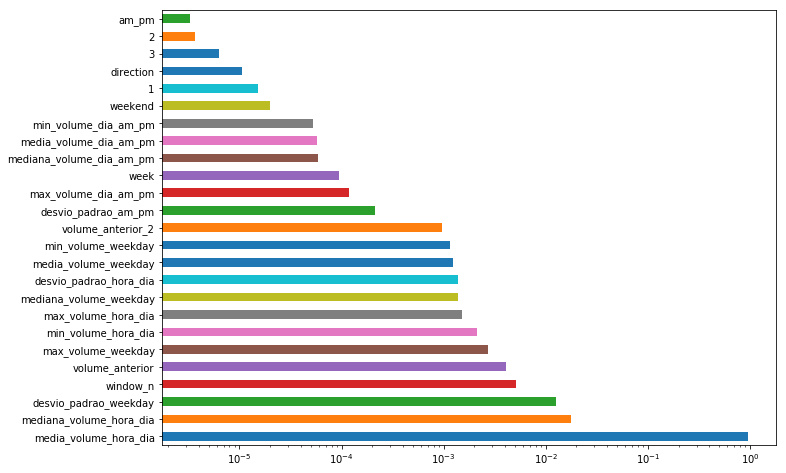

In [395]:
feat_importances_rf_2 = pd.Series(regressor_cubic_2.feature_importances_, index=feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']].columns)
feat_importances_rf_2.nlargest(25).plot(kind='barh')
plt.rcParams['figure.figsize'] = (11,8)
plt.xscale('log')

In [355]:
# Create the parameter grid based on the results of random search 
param_grid_gbrt = {
    'max_depth': [3,4,6,8],
    'min_samples_leaf': [1,2,4,6],
    'min_samples_split': [2,4,6,8],
    'n_estimators': [100, 200, 300, 400, 600],
    'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]
}
# Create a based model
gbrt = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search_gbrt = GridSearchCV(estimator = gbrt, param_grid = param_grid_gbrt, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [356]:
grid_search_gbrt.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

Fitting 4 folds for each of 1920 candidates, totalling 7680 fits
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.4s
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   1.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV] learning_rate=1, max_depth=3, min_sampl

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.0s


[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, total=   6.0s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400, total=   6.7s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=600, total=   9.2s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=600, total=   9.2s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=600, total=   9.0s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_e

[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=   5.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=600, total=   8.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=600, total=   8.6s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=600, total=   8.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=600,

[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=   8.3s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=   8.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=   8.4s
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=   8.5s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.0min


[CV]  learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=   5.7s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=   8.5s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=   8.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=   8.3s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=   8.3s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_e

[CV] learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=   8.5s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=   8.3s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=   8.5s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=   8.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100,

[CV]  learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=600, total=   8.6s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=600, total=   9.4s
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=600, total=   9.2s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=600, total=   9.8s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   1.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_e

[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=600, total=   8.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=600, total=   8.4s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=600, total=   8.8s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   1.7s
[CV] learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100,

[CV]  learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=600, total=   8.3s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=600, total=   8.6s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=600, total=   8.4s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.1s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_e

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.4min


[CV]  learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=600, total=  12.7s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=600, total=  12.8s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=600, total=  13.0s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   2.4s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   2.1s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_e

[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=600, total=  12.6s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=600, total=  12.7s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.1s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.3s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100,

[CV]  learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=  13.0s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   2.1s
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=  13.1s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   2.3s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   2.3s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_e

[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=  12.6s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100,

[CV]  learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=  12.8s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   2.3s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   2.1s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_e

[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   2.3s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200,

[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   2.3s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   2.3s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   2.0s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   2.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   4.2s
[CV] learning_rate=1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_e

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 15.6min


[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.9s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.5s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.6s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   4.9s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   9.3s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_e

[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   4.5s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   4.5s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   4.3s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   8.8s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200,

[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   4.5s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   4.6s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   4.5s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   9.1s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   9.0s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_e

[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   4.4s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   4.4s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   8.6s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   8.7s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200,

[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   4.8s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   4.6s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   9.0s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   9.2s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   8.8s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_e

[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   4.3s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   8.4s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   8.9s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   8.7s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200,

[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   4.3s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   8.0s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   8.5s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   8.3s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   8.6s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_e

[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   8.5s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   8.3s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   8.2s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   8.4s
[CV] learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=300,

[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  19.8s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  19.5s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  19.9s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  19.4s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=  21.9s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_e

[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=300 


[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 38.0min


[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=  17.4s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=  18.7s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=  18.5s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=  23.3s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=  23.8s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_e

[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=  17.0s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=  18.2s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=  27.4s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=  27.2s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300,

[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=  17.3s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=  16.8s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=  23.6s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=  23.7s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=  24.2s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_e

[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=  15.7s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=  25.6s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=  22.6s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=  23.3s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=300,

[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=  16.3s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=  23.7s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=  23.7s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=  23.3s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=  23.8s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_e

[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=  22.6s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=  22.2s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=  22.7s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=  23.7s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=400,

[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  22.1s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  22.3s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  22.5s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  23.5s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  27.4s
[CV] learning_rate=1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_e

[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   4.3s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   4.4s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   4.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   6.2s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=

[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=   4.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=   4.4s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=   4.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   6.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=1, min_samples_split=

[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   4.3s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   4.6s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   4.3s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   5.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   4.3s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   4.4s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   4.3s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   5.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=2, min_samples_split=

[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=   4.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=   4.3s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400 


[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 65.0min


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=   4.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   5.5s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   5.3s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   5.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   6.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   4.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   6.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   5.5s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   5.5s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   5.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=4, min_

[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=   4.4s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   6.3s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   6.6s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   6.1s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   6.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_

[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   5.4s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   5.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   5.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   5.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=6, min_samples_split=6

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   6.9s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   8.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   8.6s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=   6.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   8.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   8.5s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   8.9s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=1, min_

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   6.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   8.9s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   9.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   9.6s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   9.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   6.6s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   8.6s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   8.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=2, min_

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=   6.5s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   8.4s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   8.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   6.5s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   9.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   8.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   8.2s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=4, min_

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=   6.6s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   8.1s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   8.7s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   8.3s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_

[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   6.0s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   8.4s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   8.3s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   8.8s
[CV] learning_rate=0.5, max_depth=4, min_samples_leaf=6, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=  13.2s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=  18.3s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=  18.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=  17.5s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=  18.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=  13.3s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=  16.3s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=  17.9s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=  17.5s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=  16.5s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_

[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 80.9min


[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  27.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  26.3s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  26.9s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   4.0s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=1, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=  26.4s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=  27.4s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=  25.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   4.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  24.8s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   4.2s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  26.6s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  27.1s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   4.1s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=2, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  26.5s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  25.5s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  24.7s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   4.2s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   4.5s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  26.1s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  24.2s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   4.3s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  25.9s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   4.5s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=4, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  23.2s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  25.1s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   4.1s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  25.3s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   3.9s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_

[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  24.5s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  23.0s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   5.1s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  26.0s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   4.4s
[CV] learning_rate=0.5, max_depth=6, min_samples_leaf=6, min_

[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  35.7s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  39.3s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  38.7s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   9.2s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   8.0s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_

[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  36.2s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  35.0s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  38.3s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   7.9s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   7.2s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=1, min_

[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=  36.6s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=  39.2s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=  37.8s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   8.4s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   8.0s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_

[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  38.0s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  38.9s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  36.0s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   7.8s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   7.4s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=2, min_

[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  41.4s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  39.2s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  42.2s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   7.8s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   7.6s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_

[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  40.1s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  43.0s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   7.6s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  43.3s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   7.4s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=4, min_

[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  39.6s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  41.3s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  41.2s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   6.5s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   7.0s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_

[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  42.6s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   6.3s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  41.0s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  40.8s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   6.5s
[CV] learning_rate=0.5, max_depth=8, min_samples_leaf=6, min_

[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   8.3s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   8.7s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   1.6s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   1.5s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samp

[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed: 127.0min


[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   3.0s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   3.0s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, total=   4.3s
[CV] learning_rate=0.25, max_depth=3, min_samples_le

[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   2.8s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   2.8s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   1.5s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   2.8s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   3.0s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   3.1s
[CV] learning_rate=0.25, max_depth=3, min_samples_le

[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   1.5s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200, total=   2.8s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.5s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   1.6s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   3.0s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_le

[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   1.6s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   1.5s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   2.7s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   3.0s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   1.7s
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   1.5s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   1.5s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   2.8s
[CV] learning_rate=0.25, max_depth=3, min_samples_le

[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=   8.6s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   1.6s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   1.5s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   2.9s
[CV] learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=3, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  13.4s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   2.1s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   2.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   2.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   4.1s
[CV] learning_rate=0.25, max_depth=4, min_samples_le

[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  13.2s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   2.5s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   2.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   2.9s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=  13.2s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.1s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.4s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=   2.2s
[CV] learning_rate=0.25, max_depth=4, min_samples_le

[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  13.0s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   2.2s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   2.4s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   2.1s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  12.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  13.2s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   2.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   2.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   2.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_le

[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  13.2s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  12.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   2.2s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   2.0s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  12.2s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  11.9s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  12.8s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   2.2s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   2.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_le

[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  12.3s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  12.8s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   2.1s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  12.8s
[CV] learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.25, max_depth=4, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  26.5s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  25.6s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  27.8s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   4.5s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  27.7s
[CV] learning_rate=0.25, max_depth=6, min_samples_le

[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  24.6s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  24.3s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  25.9s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  26.3s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samp

[Parallel(n_jobs=-1)]: Done 3273 tasks      | elapsed: 146.4min


[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=  15.8s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=  17.1s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=  17.0s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600, total=  25.9s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600, total=  26.1s
[CV] learning_rate=0.25, max_depth=6, min_samples_le

[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  18.9s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  18.3s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  18.9s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=  25.3s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=  16.2s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=  17.3s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=  16.6s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=  16.1s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=  24.4s
[CV] learning_rate=0.25, max_depth=6, min_samples_le

[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  16.3s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  16.9s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  16.7s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  16.4s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  12.6s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400, total=  15.9s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400, total=  17.4s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400, total=  16.4s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400, total=  17.2s
[CV] learning_rate=0.25, max_depth=6, min_samples_le

[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  12.1s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  16.1s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  15.0s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  15.7s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  11.5s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  12.2s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  15.1s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  15.3s
[CV] learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  15.9s
[CV] learning_rate=0.25, max_depth=6, min_samples_le

[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=300, total=  23.7s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=300, total=  24.7s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400, total=  30.2s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400, total=  33.9s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=300, total=  20.7s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=300, total=  20.8s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=300, total=  22.5s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=  28.7s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=  29.6s
[CV] learning_rate=0.25, max_depth=8, min_samples_le

[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=  24.3s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=  25.2s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=  25.8s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  31.8s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=  20.4s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=  22.7s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=  21.8s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=  23.0s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=  27.3s
[CV] learning_rate=0.25, max_depth=8, min_samples_le

[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=  21.7s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=  22.0s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=  20.6s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=  22.0s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=  14.8s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  21.0s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  22.0s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  22.1s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  21.0s
[CV] learning_rate=0.25, max_depth=8, min_samples_le

[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=  13.1s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  19.4s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  20.4s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  20.0s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=  13.7s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=  13.0s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  19.4s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  18.7s
[CV] learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.25, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  20.6s
[CV] learning_rate=0.25, max_depth=8, min_samples_le

[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=   2.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, total=   4.2s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=300, total=   4.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=

[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   3.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   2.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, total=   4.2s
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=300, total=   4.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400 
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=1, min_samples_split=

[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   2.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   4.4s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=   4.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=

[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200, total=   3.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=200, total=   2.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   4.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=   4.4s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=

[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   3.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   4.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=   4.3s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=

[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 196.3min


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   1.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   1.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   2.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=4, min_

[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   1.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   1.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   3.0s
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   2.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   2.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_

[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   1.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   3.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   2.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   3.2s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=6, min_samples_split=6

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   3.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   2.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.7s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   4.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   2.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   2.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   4.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   4.4s
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   4.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=1, min_

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   4.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   4.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   4.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   2.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   2.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   4.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=2, min_

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   2.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   2.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   4.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   4.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   2.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   2.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   4.8s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=4, min_

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   2.6s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   2.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   4.1s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   4.5s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_

[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   2.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   2.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   4.4s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   4.3s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   4.2s
[CV] learning_rate=0.1, max_depth=4, min_samples_leaf=6, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   5.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   5.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   9.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   9.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   9.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   5.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   5.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   8.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=  10.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=  10.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=1, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   4.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=   5.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   9.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   9.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=   9.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   5.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   5.1s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   8.7s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   8.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   9.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=2, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   4.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   5.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   8.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   8.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   8.9s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   4.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   5.0s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   8.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   8.6s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   8.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=4, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   4.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=100, total=   4.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   8.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   8.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   7.8s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_

[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   4.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   4.4s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   8.3s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   8.2s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   8.5s
[CV] learning_rate=0.1, max_depth=6, min_samples_leaf=6, min_

[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=  11.0s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=  12.4s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  18.5s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  20.6s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  18.8s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_

[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   9.9s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   9.0s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=  16.0s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=  17.3s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=  16.4s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=1, min_

[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=  10.5s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=100, total=  10.0s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=  16.9s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=  17.0s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=200, total=  18.5s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_

[Parallel(n_jobs=-1)]: Done 4893 tasks      | elapsed: 236.9min


[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  34.1s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  35.5s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  34.4s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=  47.8s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=  49.3s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_

[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=  31.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=  32.7s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=  30.7s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  46.0s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  45.8s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=2, min_

[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  29.9s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  30.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=  29.4s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  41.3s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  43.8s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_

[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=  30.4s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=  29.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=  29.6s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  42.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  43.9s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=4, min_

[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=  25.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=  27.5s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=  26.1s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  36.7s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  37.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_

[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  25.7s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  25.7s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  27.2s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  36.9s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   7.0s
[CV] learning_rate=0.1, max_depth=8, min_samples_leaf=6, min_

[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   5.5s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   6.0s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   5.5s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   8.8s
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   8.2s
[CV] learning_rate=0.05, max_depth=3, min_samples_le

[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   6.2s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   6.3s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   5.9s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   6.7s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=   8.4s
[CV] learning_rate=0.05, max_depth=3, min_samples_le

[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   5.8s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   5.8s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   6.0s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   5.9s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   4.4s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   5.5s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   6.0s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   6.4s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   5.6s
[CV] learning_rate=0.05, max_depth=3, min_samples_le

[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=   4.1s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   5.6s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   5.4s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   5.9s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   4.4s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   4.5s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   5.5s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   5.4s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   5.8s
[CV] learning_rate=0.05, max_depth=3, min_samples_le

[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=   4.5s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=   4.3s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   6.3s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   5.9s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samp

[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   4.1s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   4.2s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   5.6s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   5.7s
[CV] learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_sampl

[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   6.1s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   6.9s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=   6.7s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=   8.1s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=   6.7s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=   6.5s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=   6.3s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=   6.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   8.9s
[CV] learning_rate=0.05, max_depth=4, min_samples_le

[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   6.9s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   7.0s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   6.9s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=300, total=   7.0s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=200, total=   4.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   6.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   6.3s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   6.9s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=300, total=   6.7s
[CV] learning_rate=0.05, max_depth=4, min_samples_le

[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200, total=   4.4s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=   6.5s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=   6.4s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=300, total=   6.7s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   4.6s
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=200, total=   4.3s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   6.4s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   6.6s
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=300, total=   6.1s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=400 
[CV] learning_rate=0.05, max_depth=4, min_samples_le

[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   4.7s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=200, total=   4.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=   6.6s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=   6.4s
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=300, total=   6.1s
[CV] learning_rate=0.05, max_depth=4, min_samples_le

[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   4.4s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   4.2s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   4.8s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   6.5s
[CV] learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   6.0s
[CV] learning_rate=0.05, max_depth=4, min_samples_le

[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  10.2s
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=  10.5s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=200, total=   9.6s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=300, total=  14.0s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   9.3s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   9.0s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   9.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   9.5s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=300, total=  12.9s
[CV] learning_rate=0.05, max_depth=6, min_samples_le

[Parallel(n_jobs=-1)]: Done 5824 tasks      | elapsed: 279.4min


[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   9.0s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   9.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   9.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=   9.1s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=300, total=  12.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_le

[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   9.6s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=  10.5s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   9.5s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=200, total=   9.6s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=   5.4s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=200, total=   9.4s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=200, total=   9.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=200, total=   8.8s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=200, total=   9.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_le

[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=   5.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   8.9s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   9.0s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=200, total=   9.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   5.2s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=   5.3s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   9.1s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   9.4s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=200, total=   9.6s
[CV] learning_rate=0.05, max_depth=6, min_samples_le

[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   5.2s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   5.3s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   9.0s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   8.9s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   5.1s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   5.2s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   5.4s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   8.5s
[CV] learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   8.7s
[CV] learning_rate=0.05, max_depth=6, min_samples_le

[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=  11.3s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=  11.3s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=  12.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=200, total=  20.5s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=  10.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=  11.0s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=  10.9s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=  11.0s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=200, total=  18.7s
[CV] learning_rate=0.05, max_depth=8, min_samples_le

[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=  11.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=  11.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=  11.9s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=100, total=  12.3s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=  46.7s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=  10.3s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=  11.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=  10.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=100, total=  11.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_le

[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=  46.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=  10.7s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=  10.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=100, total=  10.7s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=  10.8s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  45.1s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=  46.1s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=  10.5s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=100, total=  11.7s
[CV] learning_rate=0.05, max_depth=8, min_samples_le

[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  39.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=  39.7s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=   9.5s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=100, total=  10.7s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   9.8s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  39.4s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  37.2s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=  42.1s
[CV] learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  learning_rate=0.05, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=100, total=   9.9s
[CV] learning_rate=0.05, max_depth=8, min_samples_le

[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  10.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=   8.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  11.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=100, total=   1.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=4, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=   9.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=   9.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=   9.1s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  10.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=8, n_estimators=100, total=   1.8s
[CV] learning_rate=0.01, max_depth=3, min_samples_le

[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   8.8s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   8.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   9.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=600, total=   9.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=400, total=   6.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=   9.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=   8.5s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=   9.6s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=2, min_samples_split=6, n_estimators=600, total=   9.0s
[CV] learning_rate=0.01, max_depth=3, min_samples_le

[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=400, total=   6.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   9.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   8.6s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=600, total=   9.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   6.0s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=400, total=   6.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=   8.8s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=   9.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=6, n_estimators=600, total=   9.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_le

[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   6.3s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=400, total=   6.4s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=   8.7s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=2, n_estimators=600, total=   8.6s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   6.9s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   7.5s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=   7.7s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=   9.2s
[CV] learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=8, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=3, min_samples_leaf=6, min_samples_split=6, n_estimators=600, total=   8.8s
[CV] learning_rate=0.01, max_depth=3, min_samples_le

[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=  10.7s
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=  10.3s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=400, total=  10.8s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=2, n_estimators=600, total=  13.7s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=4, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=  10.4s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=  10.5s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=   9.7s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=400, total=  10.5s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=1, min_samples_split=6, n_estimators=600, total=  14.8s
[CV] learning_rate=0.01, max_depth=4, min_samples_le

[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   9.8s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=   9.6s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  10.6s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=400, total=  10.5s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=2, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samp

[Parallel(n_jobs=-1)]: Done 6837 tasks      | elapsed: 341.5min


[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=  14.1s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=  14.8s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=  14.5s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   2.7s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   2.7s
[CV] learning_rate=0.01, max_depth=4, min_samples_le

[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=  15.6s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=  15.2s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=  15.4s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   2.8s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=2, n_estimators=200 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=  14.1s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=  14.6s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=  14.4s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100, total=   2.6s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=  13.8s
[CV] learning_rate=0.01, max_depth=4, min_samples_le

[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=600, total=  13.9s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=600, total=  13.6s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=600, total=  14.8s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=4, min_samples_split=8, n_estimators=600, total=  14.3s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  11.0s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=600, total=  13.7s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=600, total=  13.4s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=4, n_estimators=600, total=  14.5s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=6, n_estimators=100, total=   2.7s
[CV] learning_rate=0.01, max_depth=4, min_samples_le

[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=   9.9s
[CV] learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=600, total=  13.8s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=600, total=  14.6s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samples_split=8, n_estimators=600, total=  14.3s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=4, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=400, total=  23.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=400, total=  23.8s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=600, total=  29.8s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=600, total=  32.9s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=4, n_estimators=600, total=  30.5s
[CV] learning_rate=0.01, max_depth=6, min_samples_le

[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=  20.9s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=  22.8s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600, total=  29.3s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samples_split=8, n_estimators=600, total=  32.0s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  23.6s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  23.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  25.0s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=  29.8s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=4, n_estimators=600, total=  33.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_le

[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=  22.5s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=  21.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=  21.0s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samples_split=8, n_estimators=600, total=  31.5s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  22.5s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  22.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  22.9s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  24.2s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=4, n_estimators=600, total=  28.9s
[CV] learning_rate=0.01, max_depth=6, min_samples_le

[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400, total=  21.6s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400, total=  22.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400, total=  21.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=400, total=  22.3s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  17.0s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  21.8s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  22.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  20.4s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  20.7s
[CV] learning_rate=0.01, max_depth=6, min_samples_le

[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  16.9s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  21.5s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  21.1s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  20.6s
[CV] learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=6, min_samples_leaf=6, min_samp

[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=300, total=  38.1s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=300, total=  40.5s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400, total=  46.7s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400, total=  46.9s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=4, n_estimators=400, total=  52.4s
[CV] learning_rate=0.01, max_depth=8, min_samples_le

[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=300, total=  36.7s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=300, total=  36.1s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=  41.9s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=400, total=  47.3s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=1, min_samp

[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=  37.1s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=  39.7s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=300, total=  40.1s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  48.1s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=4, n_estimators=400, total=  47.3s
[CV] learning_rate=0.01, max_depth=8, min_samples_le

[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=  34.3s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=  33.5s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=300, total=  37.0s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=400, total=  42.1s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samples_split=8, n_estimators=600 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=2, min_samp

[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=  34.3s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=  33.9s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=  35.3s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=300, total=  35.6s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=4, n_estimators=400, total=  43.6s
[CV] learning_rate=0.01, max_depth=8, min_samples_le

[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  34.1s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  36.6s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  33.4s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=  32.6s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=4, min_samp

[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=  23.5s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  33.3s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  33.5s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  32.6s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  35.7s
[CV] learning_rate=0.01, max_depth=8, min_samples_le

[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=  23.4s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  30.5s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  33.5s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  34.4s
[CV] learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  learning_rate=0.01, max_depth=8, min_samples_leaf=6, min_samp

[Parallel(n_jobs=-1)]: Done 7680 out of 7680 | elapsed: 420.3min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 4, 6, 8], 'min_samples_leaf': [1, 2, 4, 6], 'min_samples_split': [2, 4, 6, 8], 'n_estimators': [100, 200, 300, 400, 600], 'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [357]:
grid_search_gbrt.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 100}

In [ ]:
#{'max_depth': 10, 'max_features': None, 'n_estimators': 1200}

Improvement of 1.68%.


In [21]:
regressor_cubic = RandomForestRegressor(max_depth= 10,n_estimators= 1200, oob_score=True)

In [363]:
regressor_cubic.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1217, n_jobs=1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [364]:
y_pred = regressor_cubic.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])

In [365]:
mean_absolute_percentage_error(values_test, y_pred)

0.1299696474897475

In [366]:
rmse = sqrt(mean_squared_error(y_pred, values_test))
rmse

8.727401499919115

In [367]:
mean_absolute_error(values_test, y_pred)

6.7155217842675405

In [29]:
regressor_cubic.feature_importances_

array([3.15212468e-05, 1.88307578e-05, 2.08522912e-05, 2.99271488e-05,
       2.18836841e-04, 4.34665822e-05, 5.08675471e-03, 1.86125694e-03,
       9.57501082e-06, 5.69567093e-03, 2.30238187e-03, 1.68887495e-02,
       1.97604987e-03, 9.40046339e-01, 2.92062286e-03, 1.65544884e-04,
       2.45871425e-04, 1.74937712e-04, 1.41547088e-04, 3.79196946e-04,
       1.58990367e-03, 3.37759617e-03, 1.74237101e-03, 1.48632809e-03,
       1.35458674e-02])

In [374]:
media_valores = np.std(y_pred)

In [375]:
media_valores

36.72949505690042

In [30]:
regressor_cubic.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

0.9744508717055037

In [31]:
regressor_cubic.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_test)

0.9484988091627363

In [32]:
regressor_cubic.feature_importances_

array([3.15212468e-05, 1.88307578e-05, 2.08522912e-05, 2.99271488e-05,
       2.18836841e-04, 4.34665822e-05, 5.08675471e-03, 1.86125694e-03,
       9.57501082e-06, 5.69567093e-03, 2.30238187e-03, 1.68887495e-02,
       1.97604987e-03, 9.40046339e-01, 2.92062286e-03, 1.65544884e-04,
       2.45871425e-04, 1.74937712e-04, 1.41547088e-04, 3.79196946e-04,
       1.58990367e-03, 3.37759617e-03, 1.74237101e-03, 1.48632809e-03,
       1.35458674e-02])

In [33]:
denominator = y_pred.dot(y_pred) - y_pred.mean() * y_pred.sum()

In [34]:
m = ( y_pred.dot(values_test) - values_test.mean() * y_pred.sum()) / denominator

b = ( values_test.mean() * y_pred.dot(y_pred) - y_pred.mean() * y_pred.dot(values_test)) / denominator


In [35]:
pred = m * y_pred + b

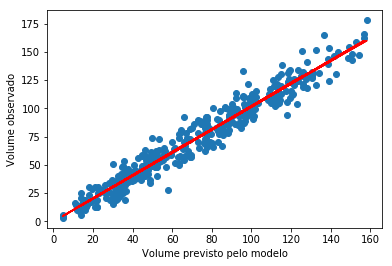

In [416]:
plt.scatter(y_pred, values_test)
plt.xlabel("Volume previsto pelo modelo") 
plt.ylabel("Volume observado")
plt.plot(y_pred, pred, 'r')

In [37]:
res = values_test - y_pred
tot = values_test - values_test.mean()

In [38]:
R_squared = 1 - res.dot(res) / tot.dot(tot)

In [39]:
print(R_squared)

0.9484988091627364


In [40]:
def display_scores(scores):
    print("Scores:", (scores))
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [121]:
scores = cross_val_score(regressor_cubic,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']],values_train, scoring="neg_mean_squared_error",cv=4)
tree_rmse_scores_test = np.sqrt(-scores)

In [122]:
display_scores(tree_rmse_scores_test)

Scores: [12.65080248 10.10100657  8.08677236 11.09112112]
Mean: 10.482425631171338
Standard deviation: 1.6550682358784417


In [ ]:
df_p = performance_metrics(df_cv)
print(df_p)
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape').savefig('test_mape.png')

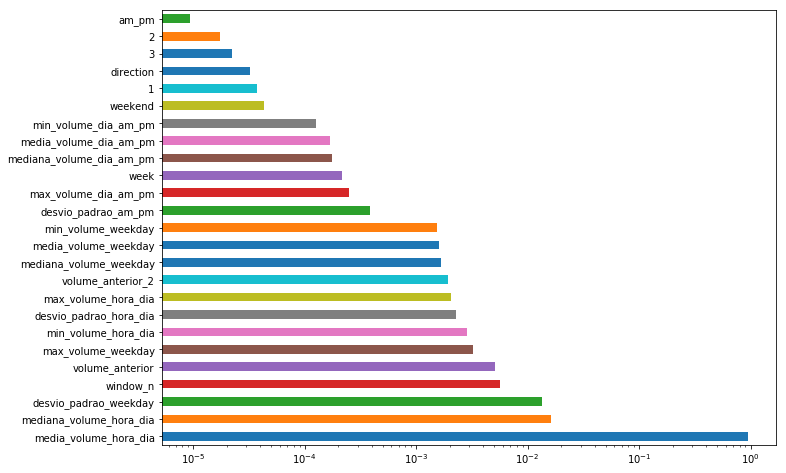

In [361]:
#colocar o grafico em escala logaritimica
feat_importances = pd.Series(regressor_cubic.feature_importances_, index=feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']].columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.rcParams['figure.figsize'] = (11,8)
plt.xscale('log')

In [369]:
y_train_predicted = regressor_cubic.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_pruned_trees = regressor_cubic.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
mse_train = sqrt(mean_squared_error(values_train, y_train_predicted))
mse_test = sqrt(mean_squared_error(values_test, y_test_predicted_pruned_trees))
print("RF with pruned trees, Train RMSE: {} Test RMSE: {}".format(mse_train, mse_test))

RF with pruned trees, Train RMSE: 6.618922905046872 Test RMSE: 8.727401499919115


In [368]:
y_train_predicted_rf_mape = regressor_cubic.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_pruned_trees_rf_mape = regressor_cubic.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
mape_train_rf = mean_absolute_percentage_error(values_train, y_train_predicted_rf_mape)
mape_test_rf = mean_absolute_percentage_error(values_test, y_test_predicted_pruned_trees_rf_mape)
print("RF with pruned trees, Train MAPE: {} Test MAPE: {}".format(mape_train_rf, mape_test_rf))

RF with pruned trees, Train MAPE: 0.12934675895991837 Test MAPE: 0.1299696474897475


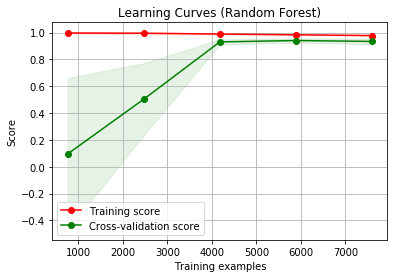

In [398]:
title = "Learning Curves (Random Forest)" 
estimator = RandomForestRegressor(n_estimators=regressor_cubic.n_estimators, max_depth=regressor_cubic.max_depth) 
plot_learning_curve(estimator, title, feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train, cv=4, n_jobs=-1) 
plt.show() 

In [397]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)): 
    plt.figure() 
    plt.title(title) 
    if ylim is not None: 
        plt.ylim(*ylim) 
    plt.xlabel("Training examples") 
    plt.ylabel("Score") 
    train_sizes, train_scores, test_scores = learning_curve( estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes) 
    train_scores_mean = np.mean(train_scores, axis=1) 
    train_scores_std = np.std(train_scores, axis=1) 
    test_scores_mean = np.mean(test_scores, axis=1) 
    test_scores_std = np.std(test_scores, axis=1) 
    plt.grid() 
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r") 
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g") 
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score") 
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score") 
    plt.legend(loc="best") 
    return plt 

In [ ]:
#Adicionar um paragrafo falando sobre os resultados

#Pegar as 5 melhores features de cada modelo e colocar numa tabela



In [ ]:
##ADABOOSTING REGRESSOR

In [435]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth':[1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100],
    'splitter': ['best', 'random'],
}
# Create a based model
dec = DecisionTreeRegressor()
# Instantiate the grid search model
grid_search_dt = GridSearchCV(estimator = dec, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [436]:
grid_search_dt.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']], values_train)

Fitting 4 folds for each of 56 candidates, totalling 224 fits
[CV] max_depth=1, splitter=best ......................................
[CV] max_depth=1, splitter=best ......................................
[CV] max_depth=1, splitter=best ......................................
[CV] ....................... max_depth=1, splitter=best, total=   0.0s
[CV] ....................... max_depth=1, splitter=best, total=   0.0s
[CV] ....................... max_depth=1, splitter=best, total=   0.0s
[CV] max_depth=1, splitter=random ....................................
[CV] max_depth=1, splitter=best ......................................
[CV] max_depth=1, splitter=random ....................................
[CV] ..................... max_depth=1, splitter=random, total=   0.0s
[CV] max_depth=1, splitter=random ....................................
[CV] ..................... max_depth=1, splitter=random, total=   0.0s
[CV] ..................... max_depth=1, splitter=random, total=   0.0s
[CV] max_depth=

[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.3s


[CV] ....................... max_depth=8, splitter=best, total=   0.1s
[CV] max_depth=8, splitter=best ......................................
[CV] ....................... max_depth=7, splitter=best, total=   0.1s
[CV] ....................... max_depth=7, splitter=best, total=   0.1s
[CV] max_depth=8, splitter=random ....................................
[CV] max_depth=8, splitter=random ....................................
[CV] ..................... max_depth=8, splitter=random, total=   0.0s
[CV] ..................... max_depth=8, splitter=random, total=   0.0s
[CV] max_depth=8, splitter=random ....................................
[CV] max_depth=8, splitter=random ....................................
[CV] ....................... max_depth=8, splitter=best, total=   0.2s
[CV] ..................... max_depth=8, splitter=random, total=   0.0s
[CV] max_depth=8, splitter=best ......................................
[CV] ..................... max_depth=8, splitter=random, total=   0.0s
[CV] .

[CV] ...................... max_depth=30, splitter=best, total=   0.2s
[CV] max_depth=35, splitter=random ...................................
[CV] .................... max_depth=35, splitter=random, total=   0.2s
[CV] max_depth=35, splitter=random ...................................
[CV] .................... max_depth=35, splitter=random, total=   0.1s
[CV] max_depth=35, splitter=random ...................................
[CV] .................... max_depth=35, splitter=random, total=   0.1s
[CV] ...................... max_depth=35, splitter=best, total=   0.2s
[CV] max_depth=40, splitter=best .....................................
[CV] max_depth=40, splitter=best .....................................
[CV] ...................... max_depth=35, splitter=best, total=   0.3s
[CV] max_depth=35, splitter=best .....................................
[CV] .................... max_depth=35, splitter=random, total=   0.1s
[CV] max_depth=40, splitter=random ...................................
[CV] .

[CV] ...................... max_depth=65, splitter=best, total=   0.4s
[CV] max_depth=70, splitter=random ...................................
[CV] ...................... max_depth=70, splitter=best, total=   0.2s
[CV] max_depth=75, splitter=best .....................................
[CV] .................... max_depth=70, splitter=random, total=   0.1s
[CV] max_depth=75, splitter=best .....................................
[CV] .................... max_depth=70, splitter=random, total=   0.1s
[CV] max_depth=70, splitter=random ...................................
[CV] ...................... max_depth=70, splitter=best, total=   0.3s
[CV] max_depth=75, splitter=random ...................................
[CV] .................... max_depth=70, splitter=random, total=   0.1s
[CV] max_depth=75, splitter=random ...................................
[CV] .................... max_depth=75, splitter=random, total=   0.1s
[CV] max_depth=75, splitter=random ...................................
[CV] .

[Parallel(n_jobs=-1)]: Done 224 out of 224 | elapsed:   10.5s finished


GridSearchCV(cv=4, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100], 'splitter': ['best', 'random']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [437]:
grid_search_dt.best_params_

{'max_depth': 6, 'splitter': 'best'}

In [438]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'base_estimator':[DecisionTreeRegressor(max_depth = 6)],
    'loss':['linear', 'square', 'exponential'],
    'n_estimators': [200, 300, 500, 800, 1200, 1500, 1800]
    #colocar um intervalo mais logico. Treino teste e validacao (tira uma parte do treino para validacao, e os
    # e eu nao posso fazer isso pra proxima janela de treino)
    #volume proximo nao pode ser utilizado
    # a media de dias da semana anterior
    # max altura, max numero de features, n_estimadores (100, 200, 300, 400)
    # max altura (80, 90,100, 110)
    # n_features deixa o numero de features fixo que eu tenho passa o auto
    # random_state tirar do decision tree
    #fazer isso
    #falar primeiro do decision tree antes mesmo do random forest
}
# Create a based model
ada = AdaBoostRegressor()
# Instantiate the grid search model
grid_search_ada = GridSearchCV(estimator = ada, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [440]:
grid_search_ada.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']], values_train)

Fitting 4 folds for each of 21 candidates, totalling 84 fits
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=linear, n_estimators=200 
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=linear, n_estimators=200 [CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
          

           presort=False, random_state=None, splitter='best'), loss=linear, n_estimators=500, total=  24.4s
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=linear, n_estimators=800 
[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=linear, n_estimators=500, total=  24.2s
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
   

           presort=False, random_state=None, splitter='best'), loss=square, n_estimators=200, total=  10.5s
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=square, n_estimators=300 
[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=square, n_estimators=300, total=  15.6s
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
   

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.8min


[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=square, n_estimators=300, total=  15.7s
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=square, n_estimators=500 
[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_le

           presort=False, random_state=None, splitter='best'), loss=square, n_estimators=1200, total=  57.5s
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=square, n_estimators=1500 
[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=square, n_estimators=1200, total=  57.3s
[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,

           presort=False, random_state=None, splitter='best'), loss=exponential, n_estimators=500, total=  24.7s
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=exponential, n_estimators=800 
[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=exponential, n_estimators=800, total=  39.3s
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_de

           presort=False, random_state=None, splitter='best'), loss=exponential, n_estimators=1500, total= 1.2min
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=exponential, n_estimators=1800 
[CV]  base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'), loss=exponential, n_estimators=1500, total= 1.2min
[CV] base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity

[Parallel(n_jobs=-1)]: Done  84 out of  84 | elapsed: 15.9min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'base_estimator': [DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')], 'loss': ['linear', 'square', 'exponential'], 'n_estimators': [200, 300, 500, 800, 1200, 1500, 1800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [441]:
grid_search_ada.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
 'loss': 'square',
 'n_estimators': 200}

In [44]:
regr_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6 ),n_estimators=200, loss='square')

In [45]:
regr_ada.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train) 

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='square', n_estimators=200,
         random_state=None)

In [46]:
y_pred_ada = regr_ada.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])

In [47]:
mean_absolute_percentage_error(values_test, y_pred_ada)

0.16733344506399592

In [49]:
mean_absolute_error(values_test, y_pred_ada)

8.155777740480806

In [50]:
rmse = sqrt(mean_squared_error(values_test, y_pred_ada))
rmse

9.80179825739475

In [91]:
regr_ada.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

0.9621064679762219

In [135]:
regr_ada.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_test)

0.9374596287121388

In [221]:
regr_ada.feature_importances_

array([1.03419547e-03, 2.15336019e-04, 3.25103434e-04, 6.85093856e-04,
       7.86965164e-03, 1.46865371e-03, 8.71584155e-02, 3.41995847e-02,
       3.86719296e-05, 6.77081077e-02, 1.56255457e-02, 1.38028008e-02,
       1.02926040e-01, 2.56576772e-01, 2.37149672e-01, 5.10542126e-03,
       3.55250170e-03, 3.39691488e-03, 3.81591149e-03, 6.59946317e-03,
       1.50731779e-02, 4.29537961e-02, 2.40221947e-02, 2.15801360e-02,
       4.71168384e-02])

In [138]:
denominator_ada = y_pred_ada.dot(y_pred_ada) - y_pred_ada.mean() * y_pred_ada.sum()

In [139]:
m = ( y_pred_ada.dot(values_test) - values_test.mean() * y_pred_ada.sum()) / denominator_ada

b = ( values_test.mean() * y_pred_ada.dot(y_pred_ada) - y_pred_ada.mean() * y_pred_ada.dot(values_test)) / denominator_ada


In [140]:
pred_ada = m * y_pred_ada + b

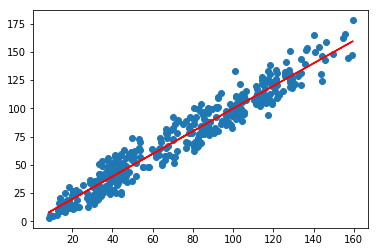

In [141]:
plt.scatter(y_pred_ada, values_test)
plt.plot(y_pred_ada, pred_ada, 'r')

In [142]:
res_ada = values_test - y_pred_ada
tot_ada = values_test - values_test.mean()

In [143]:
R_squared_ada = 1 - res_ada.dot(res_ada) / tot_ada.dot(tot_ada)

In [144]:
print(R_squared_ada)

0.9374596287121388


In [145]:
scores_ada = cross_val_score(regr_ada,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']],values_train, scoring="neg_mean_squared_error",cv=4)
tree_rmse_scores_test_ada = np.sqrt(-scores_ada)

In [146]:
display_scores(tree_rmse_scores_test)

Scores: [12.65080248 10.10100657  8.08677236 11.09112112]
Mean: 10.482425631171338
Standard deviation: 1.6550682358784417


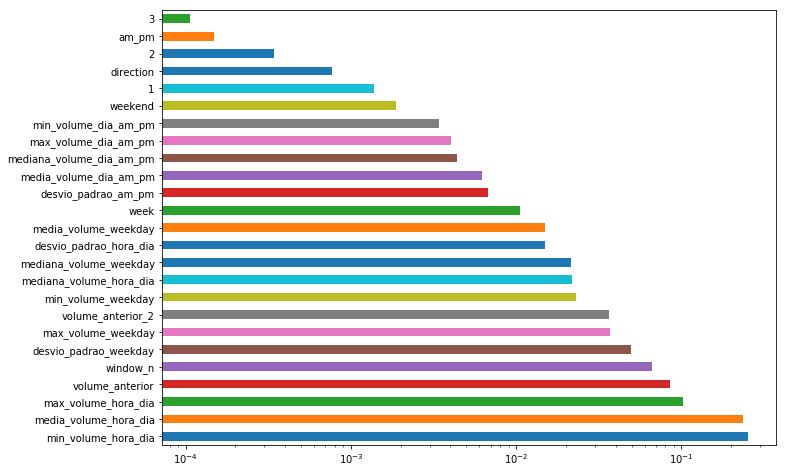

In [377]:
feat_importances_ada = pd.Series(regr_ada.feature_importances_, index=feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']].columns)
feat_importances_ada.nlargest(25).plot(kind='barh')
plt.rcParams['figure.figsize'] = (11,8)
plt.xscale('log')

In [92]:
y_train_predicted_adaboost = regr_ada.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_pruned_trees_adaboost = regr_ada.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
rmse_train_ada = sqrt(mean_squared_error(values_train, y_train_predicted_adaboost))
rmse_test_ada = sqrt(mean_squared_error(values_test, y_test_predicted_pruned_trees_adaboost))
print("ADABOOST, Train RMSE: {} Test RMSE: {}".format(rmse_train_ada, rmse_test_ada))

ADABOOST, Train RMSE: 8.060883444140185 Test RMSE: 9.6155512750335


In [399]:
y_train_predicted_adaboost_mape = regr_ada.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_pruned_trees_adaboost_mape = regr_ada.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
mape_train_adaboost = mean_absolute_percentage_error(values_train, y_train_predicted_adaboost_mape)
mape_test_adaboost = mean_absolute_percentage_error(values_test, y_test_predicted_pruned_trees_adaboost_mape)
print("ADABOOST, Train MAPE: {} Test MAPE: {}".format(mape_train_adaboost, mape_test_adaboost))

ADABOOST, Train MAPE: 0.29867273348031254 Test MAPE: 0.168588780027342


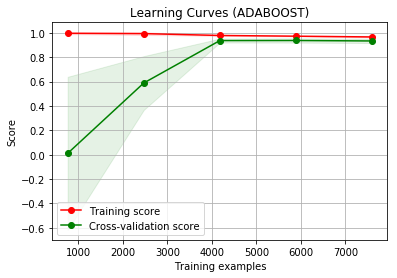

In [401]:
title = "Learning Curves (ADABOOST)" 
estimator_ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6 ),n_estimators=200, loss='square') 
plot_learning_curve(estimator_ada, title, feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train, cv=4, n_jobs=-1) 
plt.show() 

In [ ]:
param_grid={'base_estimator': [DecisionTreeRegressor([1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100])],
            'n_estimators':[200, 300, 500, 800, 1200, 1500, 1800], 
            'learning_rate': [0.1, 0.05, 0.01, 0.005], 
            'loss':['linear', 'square', 'exponential']}
n_jobs=-1 

cv,best_est=ADABooster(param_grid, n_jobs)

In [48]:
regr_ada_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 50 ),n_estimators=1200, learning_rate=0.01, loss='square')

In [69]:
regr_ada_2.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']], values_train) 

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=50, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=0.01, loss='square', n_estimators=1000,
         random_state=None)

In [50]:
regr_ada_2.feature_importances_

array([1.37931336e-04, 9.51330207e-05, 1.26443520e-04, 1.54817138e-04,
       9.36993460e-04, 1.83217593e-04, 1.16963629e-02, 6.78905033e-03,
       5.84283369e-05, 1.13979912e-02, 6.02431984e-03, 9.24351559e-03,
       4.91524781e-03, 9.03400336e-01, 6.36646993e-03, 8.77265234e-04,
       9.69521790e-04, 9.14105368e-04, 7.20033832e-04, 1.31179156e-03,
       3.49268032e-03, 1.61685218e-02, 6.74855571e-03, 3.64412346e-03,
       3.62714333e-03])

In [72]:
y_pred_ada_2 = regr_ada_2.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']])

In [73]:
mean_absolute_percentage_error(values_test, y_pred_ada_2)

0.11151855286620199

In [74]:
rmse = sqrt(mean_squared_error(values_test, y_pred_ada_2))
rmse

7.743353524767148

In [75]:
regr_ada_2.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday', 'window_n']], values_train)

0.8065314483631721

In [76]:
regr_ada_2.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm','media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday', 'window_n']], values_test)

0.909382111902157

In [77]:
denominator_ada_2 = y_pred_ada_2.dot(y_pred_ada_2) - y_pred_ada_2.mean() * y_pred_ada_2.sum()

In [78]:
m_ada_2 = ( y_pred_ada_2.dot(values_test) - values_test.mean() * y_pred_ada_2.sum()) / denominator_ada_2

b_ada_2 = ( values_test.mean() * y_pred_ada_2.dot(y_pred_ada_2) - y_pred_ada_2.mean() * y_pred_ada_2.dot(values_test)) / denominator_ada_2


In [79]:
pred_ada_2 = m_ada_2 * y_pred_ada_2 + b_ada_2

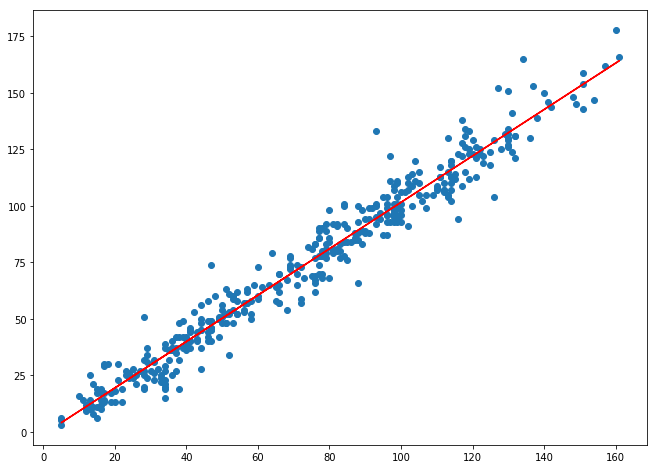

In [80]:
plt.scatter(y_pred_ada_2, values_test)
plt.plot(y_pred_ada_2, pred_ada_2, 'r')

In [81]:
res_ada_2 = values_test - y_pred_ada_2
tot_ada_2 = values_test - values_test.mean()

In [82]:
R_squared_ada_2 = 1 - res_ada_2.dot(res_ada_2) / tot_ada_2.dot(tot_ada_2)

In [83]:
print(R_squared_ada_2)

0.9594103682549895


In [84]:
scores_ada_2 = cross_val_score(regr_ada_2,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']],values_train, scoring="neg_mean_squared_error",cv=4)
tree_rmse_scores_test_ada_2 = np.sqrt(-scores_ada_2)

KeyboardInterrupt: 

In [219]:
display_scores(tree_rmse_scores_test_ada_2)

Scores: [14.49486343  9.96500591  8.31622256 13.24106602]
Mean: 11.504289481246662
Standard deviation: 2.474524697505422


In [70]:
y_train_predicted = regr_ada_2.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_pruned_trees = regr_ada_2.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
mse_train = sqrt(mean_squared_error(values_train, y_train_predicted))
mse_test = sqrt(mean_squared_error(values_test, y_test_predicted_pruned_trees))
print("RF with pruned trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))

RF with pruned trees, Train MSE: 12.660259086380023 Test MSE: 6.3811478292739485


In [71]:
y_train_predicted_mape = regr_ada_2.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_pruned_trees_mape = regr_ada_2.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
mape_train = mean_absolute_percentage_error(values_train, y_train_predicted_mape)
mape_test = mean_absolute_percentage_error(values_test, y_test_predicted_pruned_trees_mape)
print("RF with pruned trees, Train MAPE: {} Test MAPE: {}".format(mape_train, mape_test))

RF with pruned trees, Train MAPE: 0.1831798437455554 Test MAPE: 0.09346101596435397


In [40]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

In [1]:
#GRADIENT BOOSTING

In [22]:
#Fazendo o GBRT COM PARAMETROS MAIS SIMPLES

In [428]:
param_grid = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50],
    'max_features': [None],
    'n_estimators': [200, 300, 500, 800, 1200, 1500, 1800]
}
# Create a based model
gb = GradientBoostingRegressor()
# Instantiate the grid search model
grid_search_gb = GridSearchCV(estimator = gb, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [429]:
grid_search_gb.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'desvio_padrao_weekday', 'max_volume_weekday', 'min_volume_weekday', 'mediana_volume_weekday']], values_train)

Fitting 4 folds for each of 126 candidates, totalling 504 fits
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] max_depth=1, max_features=None, n_estimators=200 ................
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   3.1s
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   3.1s
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   3.1s
[CV] . max_depth=1, max_features=None, n_estimators=200, total=   3.1s
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] max_depth=1, max_features=None, n_estimators=300 ................
[CV] . max_depth=1, max_features=None, n_estimators=300, total=   1.6s
[CV] . max_dep

[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   37.9s


[CV] . max_depth=2, max_features=None, n_estimators=500, total=   4.1s
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] . max_depth=2, max_features=None, n_estimators=500, total=   4.2s
[CV] . max_depth=2, max_features=None, n_estimators=500, total=   4.2s
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] . max_depth=2, max_features=None, n_estimators=500, total=   4.3s
[CV] max_depth=2, max_features=None, n_estimators=800 ................
[CV] . max_depth=2, max_features=None, n_estimators=800, total=   6.8s
[CV] . max_depth=2, max_features=None, n_estimators=800, total=   7.0s
[CV] . max_depth=2, max_features=None, n_estimators=800, total=   6.9s
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV] max_depth=2, max_features=None, n_estimators=1200 ...............
[CV] .

[CV] . max_depth=4, max_features=None, n_estimators=500, total=  11.9s
[CV] max_depth=4, max_features=None, n_estimators=800 ................
[CV] . max_depth=4, max_features=None, n_estimators=500, total=  11.3s
[CV] max_depth=4, max_features=None, n_estimators=800 ................
[CV] . max_depth=4, max_features=None, n_estimators=800, total=  16.9s
[CV] max_depth=4, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=4, max_features=None, n_estimators=800, total=  16.8s
[CV] max_depth=4, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=4, max_features=None, n_estimators=800, total=  18.2s
[CV] max_depth=4, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=4, max_features=None, n_estimators=800, total=  17.6s
[CV] max_depth=4, max_features=None, n_estimators=1200 ...............
[CV]  max_depth=4, max_features=None, n_estimators=1200, total=  25.9s
[CV] max_depth=4, max_features=None, n_estimators=1500 ...............
[CV]  

[CV] . max_depth=6, max_features=None, n_estimators=800, total=  38.5s
[CV] max_depth=6, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=6, max_features=None, n_estimators=800, total=  40.3s
[CV] max_depth=6, max_features=None, n_estimators=1200 ...............


[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 10.9min


[CV] . max_depth=6, max_features=None, n_estimators=800, total=  41.0s
[CV] max_depth=6, max_features=None, n_estimators=1200 ...............
[CV] . max_depth=6, max_features=None, n_estimators=800, total=  41.3s
[CV] max_depth=6, max_features=None, n_estimators=1200 ...............
[CV]  max_depth=6, max_features=None, n_estimators=1200, total= 1.1min
[CV] max_depth=6, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=6, max_features=None, n_estimators=1200, total= 1.2min
[CV] max_depth=6, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=6, max_features=None, n_estimators=1200, total= 1.1min
[CV] max_depth=6, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=6, max_features=None, n_estimators=1200, total= 1.1min
[CV] max_depth=6, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=6, max_features=None, n_estimators=1500, total= 1.2min
[CV] max_depth=6, max_features=None, n_estimators=1800 ...............
[CV]  

[CV]  max_depth=8, max_features=None, n_estimators=1200, total= 1.9min
[CV] max_depth=8, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=8, max_features=None, n_estimators=1200, total= 1.9min
[CV] max_depth=8, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=8, max_features=None, n_estimators=1200, total= 2.0min
[CV] max_depth=8, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=8, max_features=None, n_estimators=1200, total= 2.0min
[CV] max_depth=8, max_features=None, n_estimators=1500 ...............
[CV]  max_depth=8, max_features=None, n_estimators=1500, total= 2.4min
[CV] max_depth=8, max_features=None, n_estimators=1800 ...............
[CV]  max_depth=8, max_features=None, n_estimators=1500, total= 2.5min
[CV] max_depth=8, max_features=None, n_estimators=1800 ...............
[CV]  max_depth=8, max_features=None, n_estimators=1500, total= 2.5min
[CV] max_depth=8, max_features=None, n_estimators=1800 ...............
[CV]  

[CV]  max_depth=10, max_features=None, n_estimators=1200, total= 3.3min
[CV] max_depth=10, max_features=None, n_estimators=1500 ..............
[CV]  max_depth=10, max_features=None, n_estimators=1200, total= 3.3min
[CV] max_depth=10, max_features=None, n_estimators=1500 ..............
[CV]  max_depth=10, max_features=None, n_estimators=1500, total= 3.2min
[CV] max_depth=10, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=10, max_features=None, n_estimators=1500, total= 3.2min
[CV] max_depth=10, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=10, max_features=None, n_estimators=1500, total= 3.3min
[CV] max_depth=10, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=10, max_features=None, n_estimators=1500, total= 3.3min
[CV] max_depth=10, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=10, max_features=None, n_estimators=1800, total= 3.2min
[CV] max_depth=15, max_features=None, n_estimators=200 ...............

[CV]  max_depth=20, max_features=None, n_estimators=1500, total= 3.0min
[CV] max_depth=20, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=20, max_features=None, n_estimators=1500, total= 2.9min
[CV] max_depth=20, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=20, max_features=None, n_estimators=1500, total= 2.8min
[CV] max_depth=20, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=20, max_features=None, n_estimators=1500, total= 3.4min
[CV] max_depth=20, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=20, max_features=None, n_estimators=1800, total= 2.6min
[CV] max_depth=25, max_features=None, n_estimators=200 ...............
[CV]  max_depth=20, max_features=None, n_estimators=1800, total= 2.6min
[CV] max_depth=25, max_features=None, n_estimators=200 ...............
[CV]  max_depth=20, max_features=None, n_estimators=1800, total= 2.5min
[CV] max_depth=25, max_features=None, n_estimators=200 ...............

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 119.8min


[CV]  max_depth=25, max_features=None, n_estimators=1500, total= 2.5min
[CV] max_depth=25, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=25, max_features=None, n_estimators=1500, total= 2.6min
[CV] max_depth=25, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=25, max_features=None, n_estimators=1500, total= 3.1min
[CV] max_depth=25, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=25, max_features=None, n_estimators=1800, total= 2.6min
[CV] max_depth=30, max_features=None, n_estimators=200 ...............
[CV]  max_depth=25, max_features=None, n_estimators=1800, total= 2.6min
[CV] max_depth=30, max_features=None, n_estimators=200 ...............
[CV]  max_depth=25, max_features=None, n_estimators=1800, total= 2.5min
[CV] max_depth=30, max_features=None, n_estimators=200 ...............
[CV]  max_depth=25, max_features=None, n_estimators=1800, total= 3.1min
[CV] max_depth=30, max_features=None, n_estimators=200 ...............

[CV]  max_depth=35, max_features=None, n_estimators=1500, total= 3.1min
[CV] max_depth=35, max_features=None, n_estimators=1800 ..............
[CV]  max_depth=35, max_features=None, n_estimators=1800, total= 2.6min
[CV] max_depth=40, max_features=None, n_estimators=200 ...............
[CV]  max_depth=35, max_features=None, n_estimators=1800, total= 2.6min
[CV] max_depth=40, max_features=None, n_estimators=200 ...............
[CV]  max_depth=35, max_features=None, n_estimators=1800, total= 2.5min
[CV] max_depth=40, max_features=None, n_estimators=200 ...............
[CV]  max_depth=35, max_features=None, n_estimators=1800, total= 3.1min
[CV] max_depth=40, max_features=None, n_estimators=200 ...............
[CV]  max_depth=40, max_features=None, n_estimators=200, total= 2.6min
[CV] max_depth=40, max_features=None, n_estimators=300 ...............
[CV]  max_depth=40, max_features=None, n_estimators=200, total= 2.6min
[CV] max_depth=40, max_features=None, n_estimators=300 ...............
[

[CV]  max_depth=45, max_features=None, n_estimators=1800, total= 2.6min
[CV] max_depth=50, max_features=None, n_estimators=200 ...............
[CV]  max_depth=45, max_features=None, n_estimators=1800, total= 2.5min
[CV] max_depth=50, max_features=None, n_estimators=200 ...............
[CV]  max_depth=45, max_features=None, n_estimators=1800, total= 3.1min
[CV] max_depth=50, max_features=None, n_estimators=200 ...............
[CV]  max_depth=50, max_features=None, n_estimators=200, total= 2.6min
[CV] max_depth=50, max_features=None, n_estimators=300 ...............
[CV]  max_depth=50, max_features=None, n_estimators=200, total= 2.6min
[CV] max_depth=50, max_features=None, n_estimators=300 ...............
[CV]  max_depth=50, max_features=None, n_estimators=200, total= 2.5min
[CV] max_depth=50, max_features=None, n_estimators=300 ...............
[CV]  max_depth=50, max_features=None, n_estimators=200, total= 3.1min
[CV] max_depth=50, max_features=None, n_estimators=300 ...............
[CV

[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed: 217.4min finished


GridSearchCV(cv=4, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'max_features': [None], 'n_estimators': [200, 300, 500, 800, 1200, 1500, 1800]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [430]:
grid_search_gb.best_params_

{'max_depth': 3, 'max_features': None, 'n_estimators': 200}

In [51]:

regressor_cubic_g = GradientBoostingRegressor(n_estimators=200,max_depth=3)

In [52]:
regressor_cubic_g.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)
yhat = regressor_cubic_g.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])

In [97]:
mean_absolute_percentage_error(values_test, yhat)

0.1396065679604815

In [98]:
rmse = sqrt(mean_squared_error(values_test, yhat))
rmse

8.954803458875974

In [53]:
mean_absolute_error(values_test, yhat)

6.9552862480957

In [99]:
regressor_cubic_g.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train)

0.9694594199322092

In [100]:
regressor_cubic_g.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_test)

0.945716348616294

In [101]:
regressor_cubic_g.feature_importances_

array([0.00197428, 0.00133836, 0.        , 0.00127501, 0.01879524,
       0.00630522, 0.08513859, 0.04815564, 0.        , 0.19494132,
       0.09393345, 0.02850464, 0.05952239, 0.13769114, 0.06788955,
       0.01312579, 0.006936  , 0.00257335, 0.00788616, 0.00884239,
       0.0184793 , 0.04071289, 0.02104933, 0.0284784 , 0.10645154])

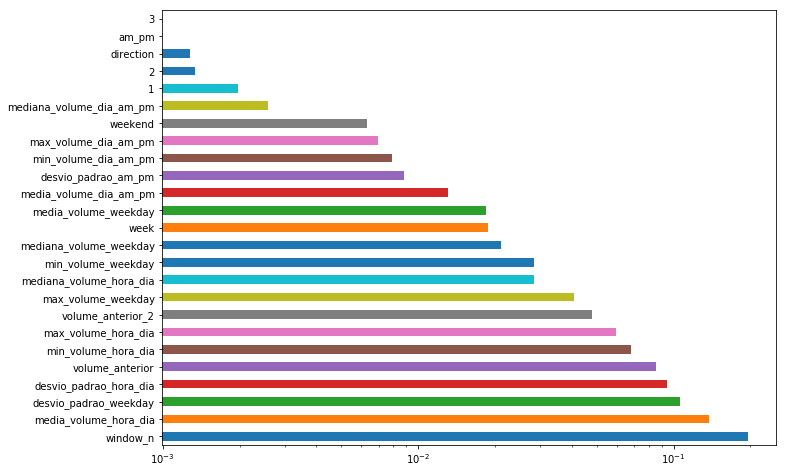

In [379]:
feat_importances = pd.Series(regressor_cubic_g.feature_importances_, index=feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']].columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.rcParams['figure.figsize'] = (11,8)
plt.xscale('log')

In [102]:
denominator_gbrt = yhat.dot(yhat) - yhat.mean() * yhat.sum()

In [103]:
m_gbrt = ( yhat.dot(values_test) - values_test.mean() * yhat.sum()) / denominator_gbrt

b_gbrt = ( values_test.mean() * yhat.dot(yhat) - yhat.mean() * yhat.dot(values_test)) / denominator_gbrt

In [104]:
pred_gbrt = m_gbrt * yhat + b_gbrt

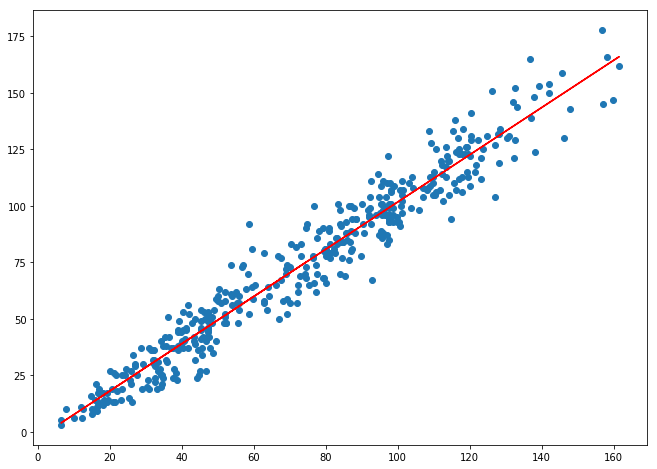

In [105]:
plt.scatter(yhat, values_test)
plt.plot(yhat, pred_gbrt, 'r')

In [106]:
res_gbrt = values_test - yhat
tot_gbrt = values_test - values_test.mean()

In [107]:
R_squared_gbrt = 1 - res_gbrt.dot(res_gbrt) / tot_gbrt.dot(tot_gbrt)

In [108]:
print(R_squared_gbrt)

0.945716348616294


In [163]:
scores_gbrt = cross_val_score(regressor_cubic_g,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']],values_train, scoring="neg_mean_squared_error",cv=4)
tree_rmse_scores_test_gbrt = np.sqrt(-scores_gbrt)

In [164]:
display_scores(tree_rmse_scores_test_gbrt)

Scores: [11.78059179 10.13453556  7.87364579 10.72736257]
Mean: 10.129033928592158
Standard deviation: 1.4293745531225124


In [54]:
scores_gbrt_mae = cross_val_score(regressor_cubic_g,feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']],values_train, scoring="neg_mean_absolute_error",cv=4)
tree_rmse_scores_test_gbrt_mae = np.sqrt(-scores_gbrt_mae)

In [57]:
display_scores(tree_rmse_scores_test_gbrt_mae)

Scores: [2.7680397  2.50340043 2.36426799 2.73247284]
Mean: 2.592045240670731
Standard	deviation: 0.16615831445776005


In [109]:
y_train_predicted_gbrt = regressor_cubic_g.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_pruned_trees_gbrt = regressor_cubic_g.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
rmse_train_gbrt = sqrt(mean_squared_error(values_train, y_train_predicted_gbrt))
rmse_test_gbrt = sqrt(mean_squared_error(values_test, y_test_predicted_pruned_trees_gbrt))
print("GBRT with pruned trees, Train RMSE: {} Test RMSE: {}".format(rmse_train_gbrt, rmse_test_gbrt))

GBRT with pruned trees, Train RMSE: 7.236669497228442 Test RMSE: 8.954803458875974


In [403]:
y_train_predicted_mape_gbrt = regressor_cubic_g.predict(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
y_test_predicted_mape_gbrt = regressor_cubic_g.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']])
mape_train_gbrt = mean_absolute_percentage_error(values_train, y_train_predicted_mape_gbrt)
mape_test_gbrt = mean_absolute_percentage_error(values_test, y_test_predicted_mape_gbrt)
print("GBRT, Train MAPE: {} Test MAPE: {}".format(mape_train_gbrt, mape_test_gbrt))

GBRT, Train MAPE: 0.17463634102784803 Test MAPE: 0.1396065679604815


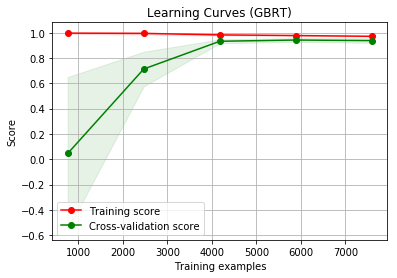

In [402]:
title = "Learning Curves (GBRT)" 
estimator_gbrt = GradientBoostingRegressor(n_estimators=200,max_depth=3) 
plot_learning_curve(estimator_gbrt, title, feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday', 'min_volume_weekday', 'desvio_padrao_weekday']], values_train, cv=4, n_jobs=-1) 
plt.show()

In [208]:
linear_regression = LinearRegression()

In [209]:
linear_regression.fit(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']], values_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [210]:
linear = linear_regression.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']])

In [211]:
mean_absolute_percentage_error(values_test, linear)

0.1622547833009417

In [212]:
rmse = sqrt(mean_squared_error(values_test, linear))
rmse

10.472662486052533

In [217]:
linear_regression.score(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']], values_train,  sample_weight=None)

0.938915713808553

In [216]:
linear_regression.score(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']], values_test,  sample_weight=None)

0.9257543265992505

In [215]:
linear_regression.feature_importances_

AttributeError: 'LinearRegression' object has no attribute 'feature_importances_'

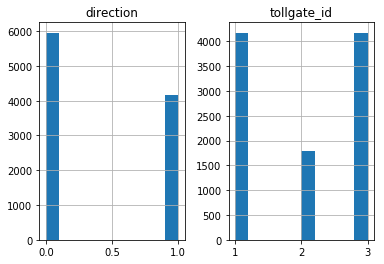

In [475]:
X_df = pd.DataFrame(data=feature_train)
X_df['LogMedHouseVal'] = values_train
_ = X_df.hist(column=['time_window', 'tollgate_id', 'direction'])

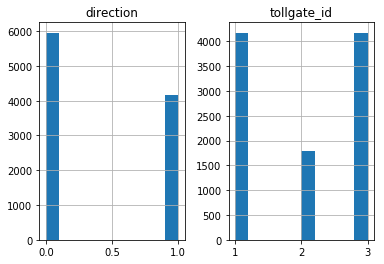

In [479]:
X_df = pd.DataFrame(data=df_train)
X_df['LogMedHouseVal'] = values_train
_ = X_df.hist(column=['time_window', 'tollgate_id', 'direction'])

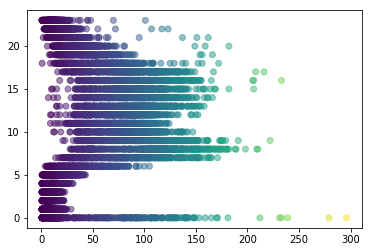

In [496]:
scatter_plot = plt.scatter(df_train['volume'], df_train['hour'], alpha=0.5, 
                           c=df_train['volume'])
plt.show()


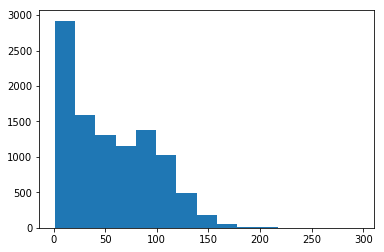

In [497]:
df_train['volume'].fillna(df_train['volume'].mean(), inplace=True)
histogram_example = plt.hist(df_train['volume'], bins=15)
plt.show()

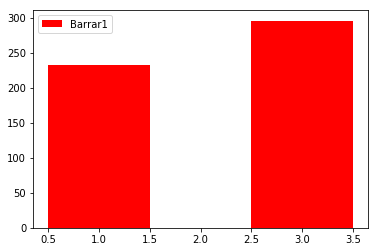

In [207]:

# Criando um gráfico
plt.bar(df_train['tollgate_id'], df_train['volume'],  label = 'Barrar1', color = 'r')
plt.legend()
 
plt.show()

In [192]:
scaler = StandardScaler()

In [193]:
features_2 = scaler.fit_transform(feature_train[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']])


In [194]:
regressor_cubic_g.fit(features_2, values_train)
yhat = regressor_cubic_g.predict(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']])

In [195]:
mean_absolute_percentage_error(values_test, y_pred_ada)

0.16671446920261762

In [196]:
rmse = sqrt(mean_squared_error(values_test, y_pred))
rmse

7.3361359342031465

In [200]:
regressor_cubic_g.score(features_2, values_train)

0.9657568523858673

In [201]:
features_test_2 = scaler.fit_transform(feature_test[[1,2,3,'direction','week', 'weekend','volume_anterior', 'volume_anterior_2', 'am_pm', 'window_n', 'desvio_padrao_hora_dia', 'mediana_volume_hora_dia', 'max_volume_hora_dia', 'media_volume_hora_dia', 'min_volume_hora_dia', 'media_volume_dia_am_pm', 'max_volume_dia_am_pm', 'mediana_volume_dia_am_pm', 'min_volume_dia_am_pm', 'desvio_padrao_am_pm', 'media_volume_weekday', 'max_volume_weekday', 'mediana_volume_weekday']])


In [203]:
regressor_cubic_g.score(features_test_2, values_test)

0.7090461693221799

In [204]:
regressor_cubic_g.feature_importances_

array([0.00140328, 0.00206515, 0.        , 0.0020993 , 0.01831132,
       0.00343895, 0.10039995, 0.07025139, 0.00065604, 0.2121546 ,
       0.13445565, 0.03711999, 0.06200667, 0.1399382 , 0.03423701,
       0.01812044, 0.01124682, 0.00488264, 0.00564607, 0.00828129,
       0.06016125, 0.04434494, 0.02877905])

In [564]:
result = []
test_data["volume"] = yhat
result.append(test_data[['tollgate_id', 'time_window', 'direction', 'volume']])

In [565]:
df_result = pd.concat(result, axis=0)
df_result.to_csv("result/result_split_gbrt_"+str(np.mean(df_result["volume"]))+".csv", index=False)

In [566]:
result_2 = []
test_data["volume"] = y_pred
result_2.append(test_data[['tollgate_id', 'time_window', 'direction', 'volume']])

In [567]:
df_result_2 = pd.concat(result_2, axis=0)
df_result_2.to_csv("result/result_split_rf_"+str(np.mean(df_result["volume"]))+".csv", index=False)

In [568]:
result_3 = []
test_data["volume"] = y_pred_ada
result_3.append(test_data[['tollgate_id', 'time_window', 'direction', 'volume']])

In [569]:
df_result_3 = pd.concat(result_3, axis=0)
df_result_3.to_csv("result/result_split_ada_"+str(np.mean(df_result_3["volume"]))+".csv", index=False)

In [570]:
result_rf = pd.read_csv('result/result_split_rf_73.29286067085843.csv')
result_gbrt = pd.read_csv('result/result_split_gbrt_73.29286067085843.csv')
result_ada = pd.read_csv('result/result_split_ada_74.17412982097916.csv')

In [588]:
def Test2(rootDir):
    file_list = []
    for lists in os.listdir(rootDir):
        path = os.path.join(rootDir, lists)
        file_list.append(path)
        if os.path.isdir(path):
            Test2(path)
    return file_list

path = "result"
file_list = Test2(path)
df = pd.read_csv(file_list[0])

file_list.remove(file_list[0])
for x in file_list:
    dftmp = pd.read_csv(x)
    print(dftmp)
    df = df.merge(dftmp, on=["tollgate_id", "time_window", "direction"])

result_list = []
for index, row in df.iterrows():
    volume_list = row[3:].tolist()
    # print volume_list
    volume_list1 = sorted(volume_list)

    result = np.mean([volume_list1[0], volume_list1[1]])
    # result = np.mean(volume_list1)

    result_list.append(result)

df = df[["tollgate_id", "time_window", "direction"]]
df["volume"] = result_list

df["time_window_start"] = pd.to_datetime(df["time_window"])
df["time_window_end"] = df["time_window_start"] + timedelta(minutes=20)
list_tw = []
for x in range(0, len(df["time_window_start"] )):
    str_tw =  '[' + str(df["time_window_start"][x]) + ',' + str(df["time_window_end"][x]) + ')'
    list_tw.append(str_tw)

df["time_window"] = list_tw
df = df[["tollgate_id", "time_window", "direction","volume"]]

     tollgate_id          time_window  direction      volume
0              1  [06:00:00,06:20:00)          0   17.797101
1              1  [06:00:00,06:20:00)          1   39.972696
2              2  [06:00:00,06:20:00)          0   32.331210
3              3  [06:00:00,06:20:00)          0   41.529412
4              3  [06:00:00,06:20:00)          1   32.982183
5              1  [06:20:00,06:40:00)          0   18.152672
6              1  [06:20:00,06:40:00)          1   44.638655
7              2  [06:20:00,06:40:00)          0   34.855530
8              3  [06:20:00,06:40:00)          0   47.643803
9              3  [06:20:00,06:40:00)          1   35.667235
10             1  [06:40:00,07:00:00)          0   19.000000
11             1  [06:40:00,07:00:00)          1   55.333333
12             2  [06:40:00,07:00:00)          0   35.401084
13             3  [06:40:00,07:00:00)          0   68.675000
14             3  [06:40:00,07:00:00)          1   38.197292
15             1  [07:00

KeyError: 'tollgate_id'

In [585]:
del df

In [586]:
df

NameError: name 'df' is not defined